<a href="https://colab.research.google.com/github/Erak93/Chocolate-sales-analysis/blob/main/Chocolate_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sales Person**: Name of the salesperson responsible for the transaction.

**Country Sales**: Region or store location where the transaction took place.

**Product**: Name of the chocolate product sold.

**Date**: The transaction date of the chocolate sale.

**Amount**: Total revenue generated from the sale.

**Boxes Shipped**:Number of chocolate boxes shipped in the order.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
chocolate_df = pd.read_csv("Chocolate_Sales.csv")
chocolate_df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [ ]:
#Check for null values
chocolate_df.isna().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [ ]:
#Extract database info
chocolate_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [ ]:
#Cleaning up data types
chocolate_df.columns = chocolate_df.columns.str.strip()

chocolate_df["Date"] = pd.to_datetime(chocolate_df["Date"], format="%d-%b-%y")
chocolate_df["Amount"] = chocolate_df["Amount"].astype(str).str.replace("$", "").str.replace(",", "").astype(float)

print("Amount of missing values in database:\n", chocolate_df.isna().sum())

Amount of missing values in database:
 Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


In [ ]:
#Check if changes were applied
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [ ]:
# Number of salespeople
number_sales_people = chocolate_df["Sales Person"].nunique()

# Salespeople deals closed sorted by number of deals
sorted_deals = chocolate_df["Sales Person"].value_counts()


print(f"Number of sales people:\n{number_sales_people}\n")
print(f"Salespeople deals closed sorted by number of deals:\n{sorted_deals}")

#Number of countries
number_countries = chocolate_df["Country"].nunique()
countries_list = chocolate_df["Country"].unique()
print("\n")
print(f"Number of countries:\n{number_countries}\n")
print("Countries")
for i in countries_list:
    print(i)


#Number of Products
number_products = chocolate_df["Product"].nunique()
product_list = chocolate_df["Product"].unique()
print("\n")
print(f"Number of products:\n{number_products}\n")
print("Products:")
for i in product_list:
    print(i)

Number of sales people:
25

Salespeople deals closed sorted by number of deals:
Sales Person
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Oby Sorrel             49
Dennison Crosswaite    49
Ches Bonnell           48
Gigi Bohling           47
Karlen McCaffrey       47
Curtice Advani         46
Madelene Upcott        45
Kaine Padly            45
Marney O'Breen         45
Jehu Rudeforth         43
Roddy Speechley        43
Gunar Cockshoot        43
Barr Faughny           43
Mallorie Waber         41
Jan Morforth           39
Andria Kimpton         39
Husein Augar           38
Dotty Strutley         36
Rafaelita Blaksland    34
Wilone O'Kielt         34
Camilla Castle         32
Name: count, dtype: int64


Number of countries:
6

Countries
UK
India
Australia
New Zealand
USA
Canada


Number of products:
22

Products:
Mint Chip Choco
85% Dark Bars
Peanut Butter Cubes
Smooth Sliky Salty
99% Dark & Pure
After Nines
50% Dark Bites
Orang

##Sales amount distribution(revenue)

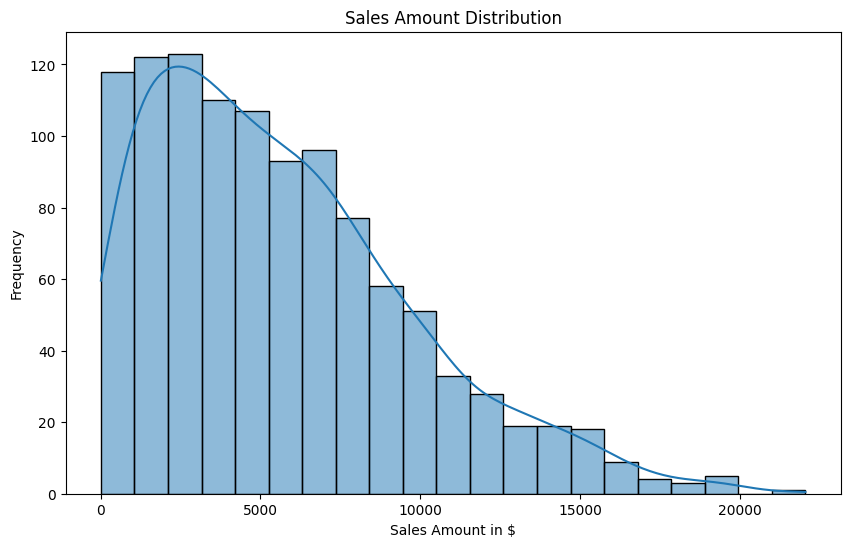

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=chocolate_df, x="Amount", kde=True)
plt.title("Sales Amount Distribution")
plt.xlabel("Sales Amount in $")
plt.ylabel("Frequency")
plt.show()

##Sales amount distribution (country)##

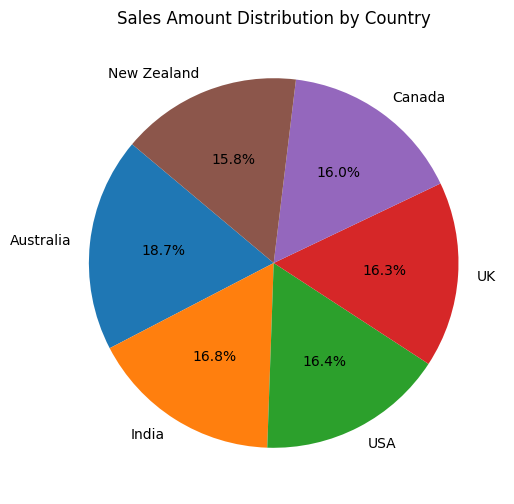

In [ ]:
plt.figure(figsize=(10, 6))
chocolate_sales_by_country = chocolate_df['Country'].value_counts()
plt.pie(chocolate_sales_by_country, labels=chocolate_sales_by_country.index, autopct='%1.1f%%', startangle=140)
plt.title("Sales Amount Distribution by Country")
plt.show()

##Sales amount distribution (product)##

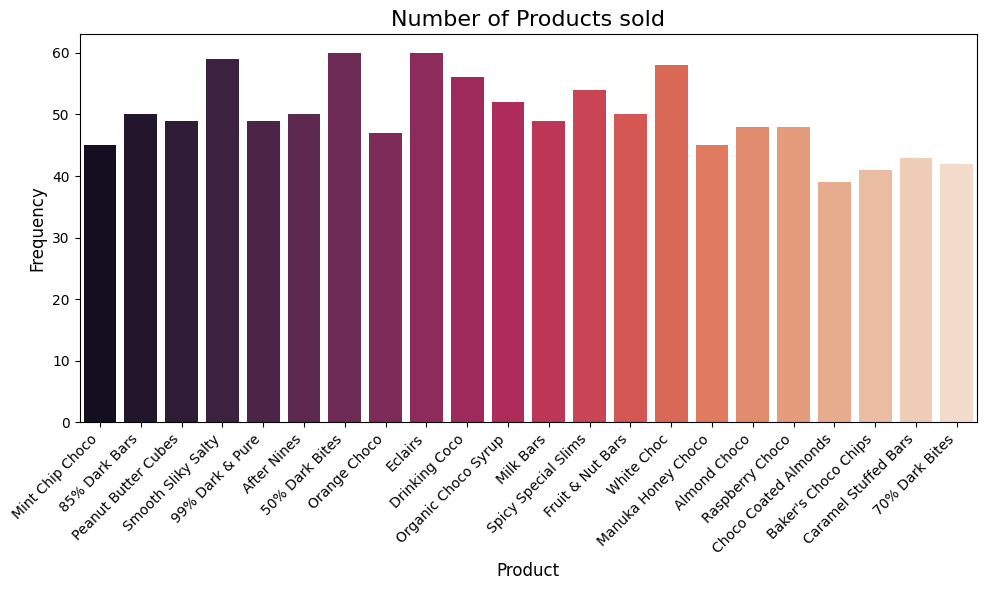

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', hue='Product', data=chocolate_df, palette='rocket', legend=False)
plt.title('Number of Products sold', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Sales amount distribution (sales people)##

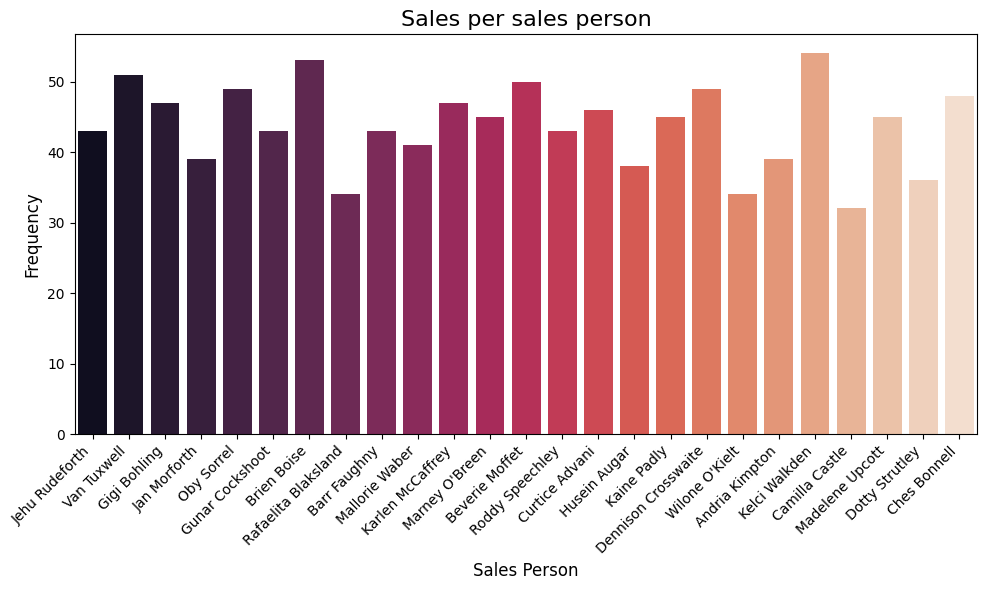

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sales Person', hue='Sales Person', data=chocolate_df, palette='rocket', legend=False)
plt.title('Sales per sales person', fontsize=16)
plt.xlabel('Sales Person', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Sales over time(trend)##

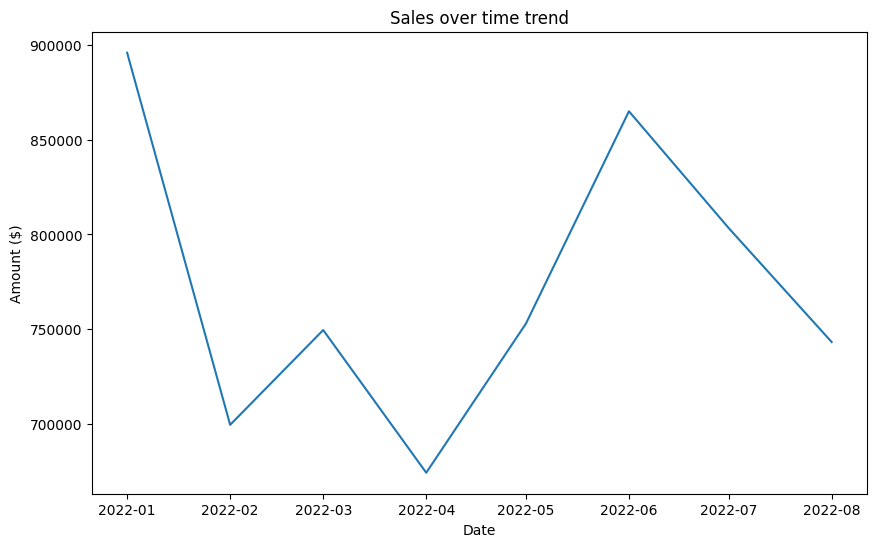

In [ ]:
#Group the sales happened in the same month and sum
sales_over_time=chocolate_df.groupby(chocolate_df["Date"].dt.to_period("M"))["Amount"].sum()
# Reset the index to convert PeriodIndex to DataFrame
sales_over_time = sales_over_time.reset_index()
#Transforms month into time stamp
sales_over_time["Date"] = sales_over_time["Date"].dt.to_timestamp()
plt.figure(figsize=(10, 6))
sns.lineplot(x="Date", y="Amount", data=sales_over_time)
plt.title("Sales over time trend")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.show()

##Most popular products per Country##

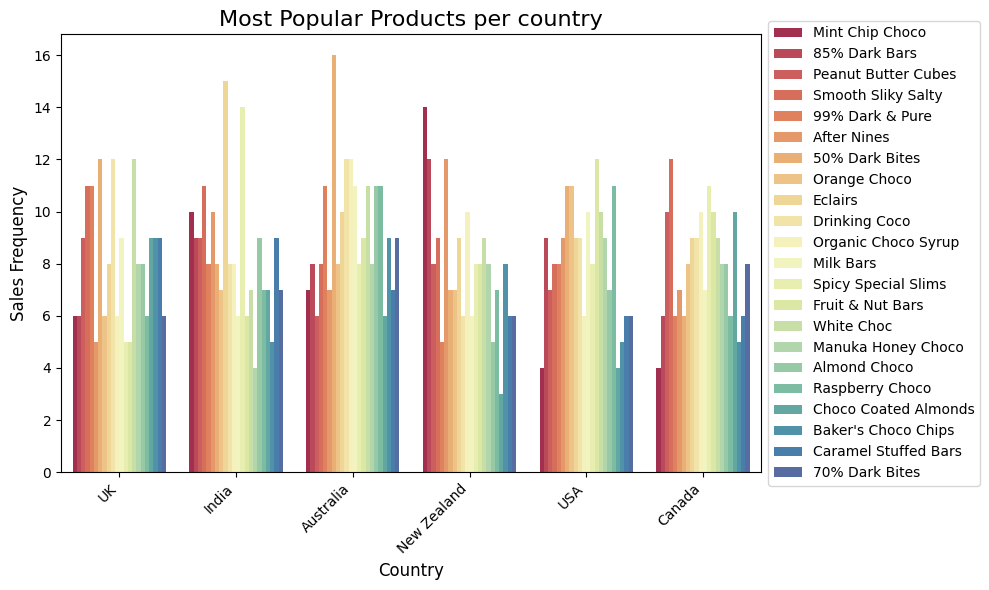

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', hue='Product', data=chocolate_df, palette='Spectral', legend=True)
plt.title('Most Popular Products per country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sales Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

##Most profitable country##


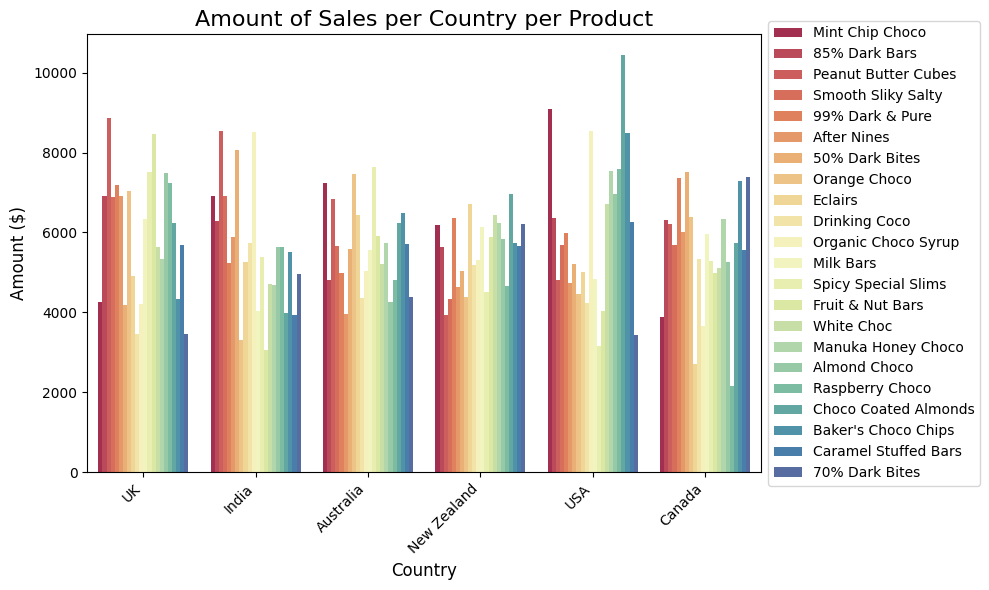

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Amount', hue='Product', data=chocolate_df,errorbar=None, palette='Spectral')
plt.title('Amount of Sales per Country per Product', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [ ]:
#Adding box price column to check the most profitable single boxes price
chocolate_df['Box-Price'] = chocolate_df['Amount'] / chocolate_df['Boxes Shipped']
chocolate_df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Box-Price
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,29.555556
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,84.000000
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,49.461538
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,37.210526
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,74.375000
...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323,13.653251
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119,55.117647
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217,2.645161
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384,5.432292


##Best negotiation deal##

In [ ]:
fig = px.bar(chocolate_df,
             x='Sales Person',
             y='Box-Price',
             color='Product',
             title='Best negotiation deal',
             barmode='stack',
             hover_data=['Product'])
fig.update_layout(
    xaxis_title='Sales Person',
    yaxis_title='Box_Price ($)',
    legend_title='Product')
fig.show()

In [ ]:
fig = px.bar(chocolate_df,
             x='Sales Person',
             y='Boxes Shipped',
             color='Product',
             title='Amount of boxes shipped per Product',
             barmode='stack',
             hover_data=['Product'])
fig.update_layout(
    xaxis_title='Sales Person',
    yaxis_title='Boxes Shipped',
    legend_title='Product')
fig.show()

##Final considerations##
The revenue generated from most transactions seems to reside between 2000 and 5000 dollars per transaction

<br>

Australia is the country generating the most revenue with 18.7% of total revenue followed by India, USA, UK, Canada, and New Zeland

<br>

Products sold more frequently are:

* Smooth Silky Salty
* 50% Dark Bites
* Eclaire

<br>

The least sold products are:
* Choco Coated Almonds
* Baker's Choco Chips
* 70% Dark Bites.

<br>

It is unclear if this might depend by the single unit price pre-negotitation as this information is not given

<br>
<br>

The most active Sales people are:
* Kelci Walkden,
* Brien Boise
* Van Tuxwell

<br>

The beginning of January sees the highest revenue while a significant drop is observed in February, specifically from 900k to 700k dollars. Sales rump up again between April and June and then decline again until August.

The products generating the highest revenue per country are the following:
* UK: Peanut butter cubes
* India: Peanut butter cubes and organic choco syrup
* Australia: Orange Choco and organic choco syrup
* NZ: Choco coated almonds
* USA: Choco coated almonds
* Canada: 70% Dark Bites and 50% dark bites

<br>

The boxes sold usually at the highest prices are:
* White Choc
* Minth Chip Choco
* Fruit and nuts bars


